### Bianconi-Barabási Model

&nbsp;

Bianconi-Barabási Model is a generalized form of Barabási-Albert Model. Barabási-Albert Model shows us the first-mover advantage in complex networks. The earliest vertices obtain more edges than the later ones. However, not all vertices are created equally. This is why Bianconi-Barabási Model introduces a concept called fitness where higher fitness leads to quicker acquisitions of edges. Unfortunately, `networkx` does not provide BB Model in their random graphs. As long as we fully comprehend how the model works, we can always implement the model by ourselves. We can pass the adjacency matrix back to `networkx` if needed.

Details of Barabási-Albert Model can be found in the link below

https://github.com/je-suis-tm/graph-theory/blob/master/barabasi%20albert%20model.ipynb

Check the original paper to view the derivation of the connectivity distribution of Bianconi-Barabási Model

https://www.researchgate.net/publication/258276558_Competition_and_multiscaling_in_evolving_Networks

&nbsp;

In [1]:
import os
os.chdir('K:/ecole/github')
import matplotlib.pyplot as plt
import numpy as np

#graph adt
#check the below link for more details
# https://github.com/je-suis-tm/graph-theory/blob/master/graph.py
import graph

In [2]:
#dual axis plot
def dual_axis_plot(xaxis,data1,data2,fst_color='r',
                    sec_color='b',fig_size=(10,5),
                   x_label='',y_label1='',y_label2='',
                   legend1='',legend2='',grid=False,title=''):
    
    fig=plt.figure(figsize=fig_size)
    ax=fig.add_subplot(111)
    

    ax.set_xlabel(x_label,fontsize=15)
    ax.set_ylabel(y_label1,color=fst_color,
                  rotation=0,fontsize=20)
    ax.plot(xaxis,data1,color=fst_color,label=legend1)
    ax.tick_params(axis='y',labelcolor=fst_color)
    ax.yaxis.labelpad=15

    plt.legend(loc='upper left')
    ax2 = ax.twinx()

    ax2.set_ylabel(y_label2,color=sec_color,
                   rotation=0,fontsize=20)
    ax2.plot(xaxis,data2,color=sec_color,label=legend2)
    ax2.tick_params(axis='y',labelcolor=sec_color)
    ax2.yaxis.labelpad=15

    fig.tight_layout()
    plt.legend(loc='upper right')
    plt.grid(grid)
    plt.title(title,y=1.05,fontsize=15)
    plt.show()

In [3]:
bbmodel=graph.graph()

In [4]:
#initial parameters
min_degree=5

num_of_v=100

#default fitness for each vertex is 0.1
etas=dict(zip(range(num_of_v),[0.1 for _ in range(num_of_v)]))

In [5]:
#create an extreme case of fitness
#randomly selected a few vertices
#where fitness is negatively correlated with its time of arrival in the graph
etas[70]=0.8
etas[59]=0.6
etas[34]=0.4
etas[21]=0.3

In [6]:
#keep track of degree change during the arrival of new vertices
degree_hist=[]

In [7]:
#in a barabási albert model
#all vertices should suffice the minimum degree
#that is not the case in networkx
#you may encounter some vertices that violate the minimum degree
#so we create a fully connected graph for first comers
#first comers are guaranteed to have the minimum degree
for i in range(min_degree+1):
    for j in range(min_degree+1):
        if i!=j:
            bbmodel.append(i,j,1)

In [8]:
#add new vertices
for i in range(min_degree,num_of_v):
    
    #initialize counter and available vertices
    counter=0
    available=bbmodel.vertex()
    
    #keep track of degree change during the arrival of new vertices
    degree_hist.append([bbmodel.degree(node) for node in available])
    
    #each newcomer has to suffice the minimum degree
    while counter<min_degree: 
        
        #get degree of each vertex
        degree_dst=[bbmodel.degree(node) for node in available]

        #degree times eta
        #we obtain its fitness
        fitness=np.multiply(degree_dst,[etas[node] for node in available])
        fitness_prob=dict(zip(available,fitness/fitness.sum()))
        
        #select vertex based upon fitness
        selected=np.random.choice(available,p=list(fitness_prob.values()))
        
        #remove selected
        available.remove(selected)
        del fitness_prob[selected]
        
        #create an edge
        bbmodel.append(i,selected,1)
        bbmodel.append(selected,i,1)
        
        counter+=1

&nbsp;

### Degree Versus Fitness

&nbsp;

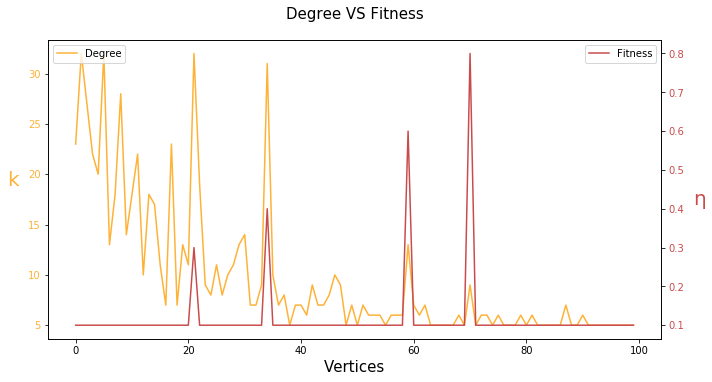

In [9]:
#in a bianconi barabási model
#fitness has more power over first mover advantage
#vertex 21 arrives later than vertex 0
#yet it has the largest degree
dual_axis_plot(bbmodel.vertex(),
               [bbmodel.degree(node) for node in bbmodel.vertex()],
                etas.values(),
               fst_color='#FEB236',sec_color='#C94C4C', 
               x_label='Vertices', y_label1='k',y_label2='η',
               legend1='Degree', legend2='Fitness',
               title='Degree VS Fitness')

&nbsp;

### Tradeoff Between Arrival and Fitness

&nbsp;

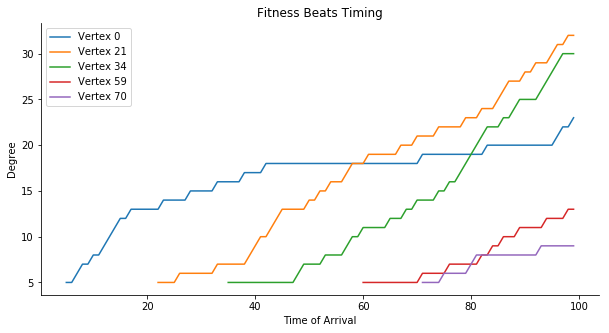

In [10]:
#although vertex 70 has the largest degree
#it does not exceed vertex 0 in terms of degree
#this model still preserves some of the features in barabási albert model
ax=plt.figure(figsize=(10,5)).add_subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.plot(range(min_degree,num_of_v),
         [i[0] for i in degree_hist],label='Vertex 0')
plt.plot(range(21+1,num_of_v),
         [i[21] for i in degree_hist[(21-min_degree+1):]],
         label='Vertex 21')
plt.plot(range(34+1,num_of_v),
         [i[34] for i in degree_hist[(34-min_degree+1):]],
         label='Vertex 34')
plt.plot(range(59+1,num_of_v),
         [i[59] for i in degree_hist[(59-min_degree+1):]],
         label='Vertex 59')
plt.plot(range(70+1,num_of_v),
         [i[70] for i in degree_hist[(70-min_degree+1):]],
         label='Vertex 70')
plt.legend()
plt.title('Fitness Beats Timing')
plt.xlabel('Time of Arrival')
plt.ylabel('Degree')
plt.show()

&nbsp;

### Degree Distribution

&nbsp;

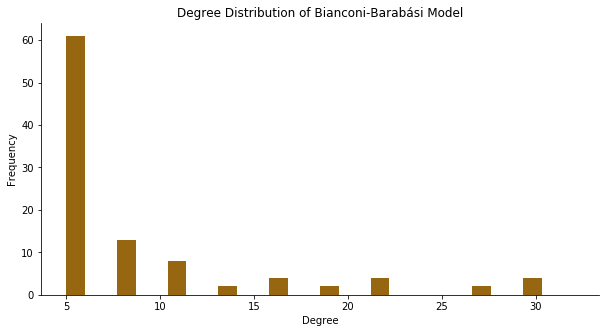

In [11]:
#get degree
degree_dst=[bbmodel.degree(node) for node in bbmodel.vertex()]

#viz
ax=plt.figure(figsize=(10,5)).add_subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#you can use logarithm binning to look nicer
plt.hist(degree_dst,bins=10,width=1,color='#966610')
plt.title('Degree Distribution of Bianconi-Barabási Model')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

&nbsp;

### Power-law Distribution

&nbsp;

No power-law distribution chart is here. Good luck on solving C!

&nbsp;

$$
P(k) = \int_{0}^{\eta_{max}} d\eta\rho(\eta)\frac{C}{\eta}(\frac{m}{k})^{\frac{C}{\eta}+1} \sim k^{\frac{C}{\eta}+1}
$$

$$
 \eta_{max} < C \le 2\eta_{max}
$$

$$ 1 = \int_{0}^{\eta_{max}}d\eta\rho(\eta)\frac{1}{\frac{C}{\eta}-1}
$$

&nbsp;

### NetworkX

&nbsp;

In [12]:
#how to pass the adjacency matrix to networkx

bbmodel=graph.create_bb_model(3,20,np.random.uniform(size=20))

import networkx as nx

G=nx.from_numpy_matrix(np.mat(bbmodel.mat()))